In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import f1_score, classification_report, silhouette_samples, silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.naive_bayes import CategoricalNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
import umap
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime
import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", 
        color_codes=True, 
        font_scale = 2)

In [2]:
os.chdir('/Users/patrickrs/Documents/GitLab/patrick-steiner/Exercises')

In [3]:
data = pd.read_csv("/Users/patrickrs/Documents/GitLab/patrick-steiner/Exercises/data/PlayerAttributeData.csv",
                  delimiter = ",",
                  index_col = "ID",
                  #dtype = "float64",
                  verbose = True
                  )

Tokenization took: 37.95 ms
Type conversion took: 44.12 ms
Parser memory cleanup took: 0.03 ms
Tokenization took: 1.98 ms
Type conversion took: 6.16 ms
Parser memory cleanup took: 0.01 ms


/opt/anaconda3/envs/propulsion/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (11,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.drop("Unnamed: 0", 
          axis = 1,
          inplace = True)

In [5]:
data = data.applymap(lambda x: str(x).split("+")[0])
data = data.applymap(lambda x: str(x).split("-")[0])

In [6]:
data = data.astype("int")

In [8]:
data.index.is_unique
# data has duplicates!

False

In [141]:
data = data.loc[np.logical_not(data.index.duplicated(keep='first'))] 

In [164]:
pos = pd.read_csv("/Users/patrickrs/Documents/GitLab/patrick-steiner/Exercises/data/PlayerPlayingPositionData.csv",
                  delimiter = ",",
                  index_col = "ID",
                  usecols = ["Preferred Positions", "ID"],
                  verbose = True
                  )

Tokenization took: 28.21 ms
Type conversion took: 3.90 ms
Parser memory cleanup took: 0.03 ms


In [165]:
pos = pos.applymap(lambda x: str(x).split(" ")[0])

In [166]:
pos.index.is_unique

False

In [167]:
pos = pos.loc[np.logical_not(pos.index.duplicated(keep='first'))] 

In [168]:
# Check if size is the same:
len(pos) == data.shape[0]

True

In [169]:
# Check if all elements in index are the same:
all(pos.index == data.index) 

True

### Perform a principal component analysis (PCA). Analyze and interpret the results by creating visuals.

### How many principal components represent 80% of the total variance?

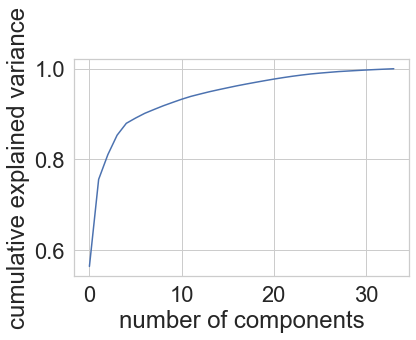

In [23]:
pca = PCA().fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [25]:
np.cumsum(pca.explained_variance_ratio_)

array([0.56367538, 0.75574172, 0.81044629, 0.85328609, 0.87955216,
       0.89111138, 0.90160829, 0.91002493, 0.91819197, 0.92551532,
       0.93266131, 0.93900947, 0.9441922 , 0.94921959, 0.95373721,
       0.95807774, 0.9623427 , 0.96624975, 0.96999595, 0.9736419 ,
       0.9771658 , 0.98040528, 0.9833996 , 0.98607735, 0.98846671,
       0.99037462, 0.99207249, 0.99372722, 0.99492951, 0.99609276,
       0.99720115, 0.99819956, 0.9991199 , 1.        ])

ANSWER: 3 components explain 81% of the variation.

### Apply clustering after PCA. Compare it with yesterday’s results.

In [43]:
# I'll try 6 components which explain about 90% of the data
pc = PCA(n_components = 6).fit_transform(data)

In [44]:
pc

array([[-1.23698131e+02, -9.00901530e+01,  4.06421103e+01,
         2.99603989e+01, -4.42873002e+01,  3.78956604e+00],
       [-1.18281036e+02, -1.08197023e+02,  3.98311120e+01,
        -3.32614936e+00, -9.03110736e+00,  7.45075606e-01],
       [-1.07763792e+02, -9.28293155e+01,  3.20306650e+01,
        -9.49209959e+00, -1.20313017e+01,  6.02069610e+00],
       ...,
       [ 5.71952374e+01, -4.72787552e+01, -4.87258841e+01,
         1.04766795e-01,  1.20378501e+01, -3.05540693e+01],
       [ 3.72370068e+01,  1.58081932e+01, -3.30266292e+01,
        -1.53270201e+01,  2.34689750e+01, -1.04963812e+01],
       [ 9.01538064e+01,  4.17405838e+01, -6.11792153e+01,
         1.09584855e+01,  8.32499839e+00, -3.52665945e+00]])

In [45]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
score = [kmeans[i].fit(pc).score(pc) for i in range(len(kmeans))]

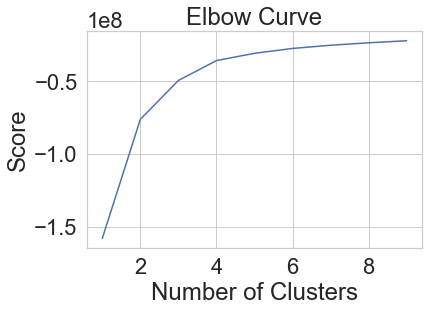

In [46]:
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [37]:
# 4 clusters seem ideal

For n_clusters = 2 The average silhouette_score is : 0.617148974709138
For n_clusters = 3 The average silhouette_score is : 0.38402705349462446
For n_clusters = 4 The average silhouette_score is : 0.37339552540921667
For n_clusters = 5 The average silhouette_score is : 0.34237829601319436
For n_clusters = 6 The average silhouette_score is : 0.3052493181300576
For n_clusters = 7 The average silhouette_score is : 0.3013002723262319
For n_clusters = 8 The average silhouette_score is : 0.29221213990654177
For n_clusters = 9 The average silhouette_score is : 0.28175335872309104


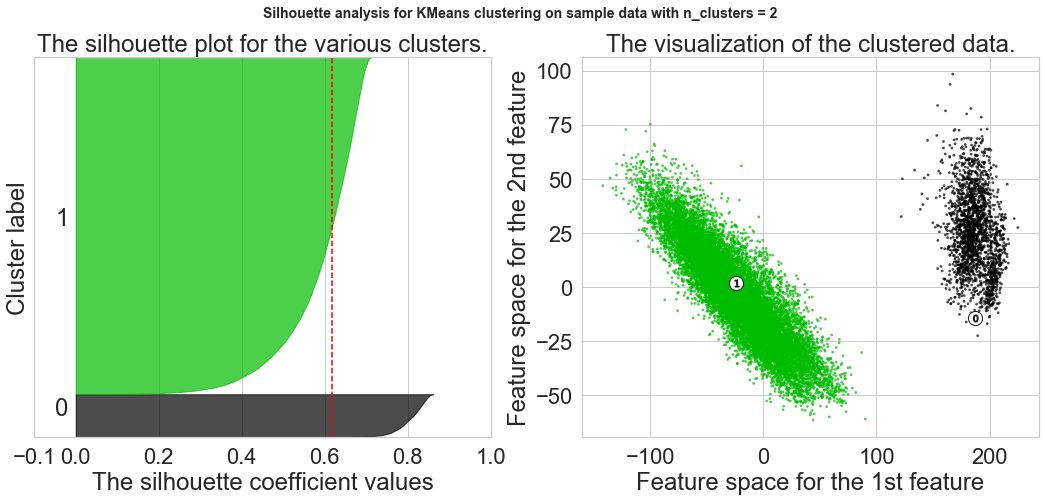

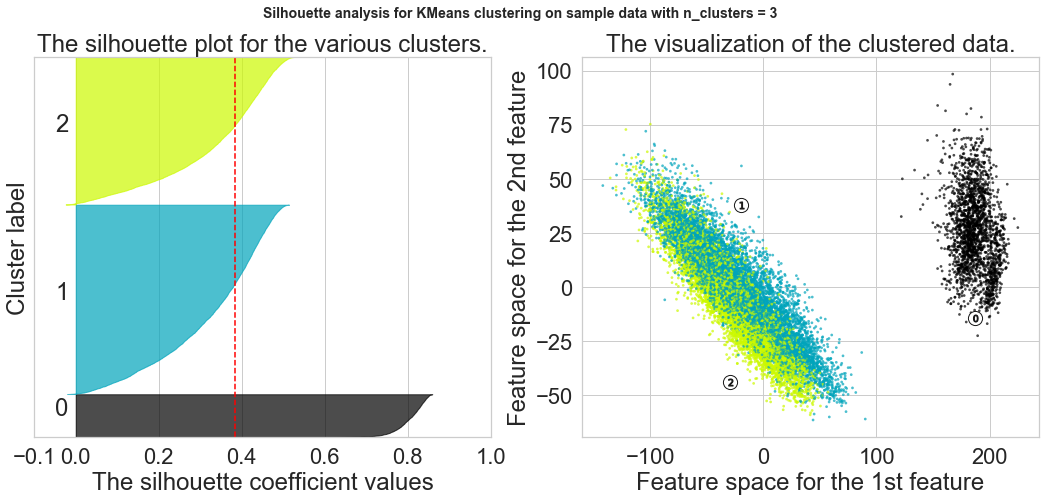

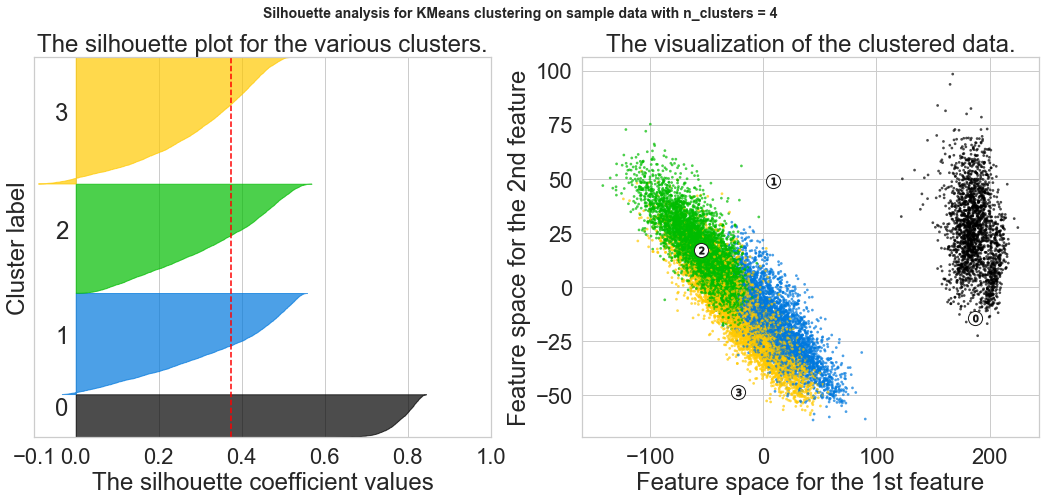

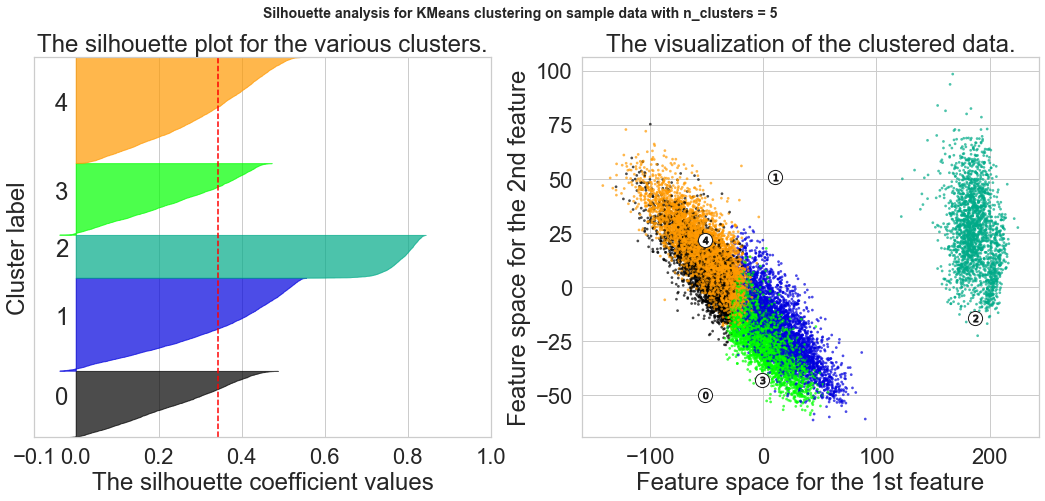

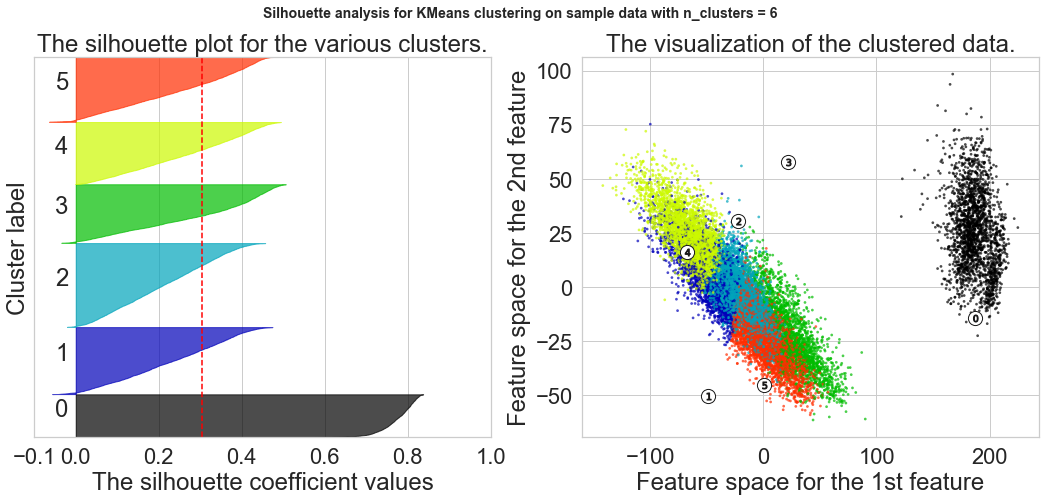

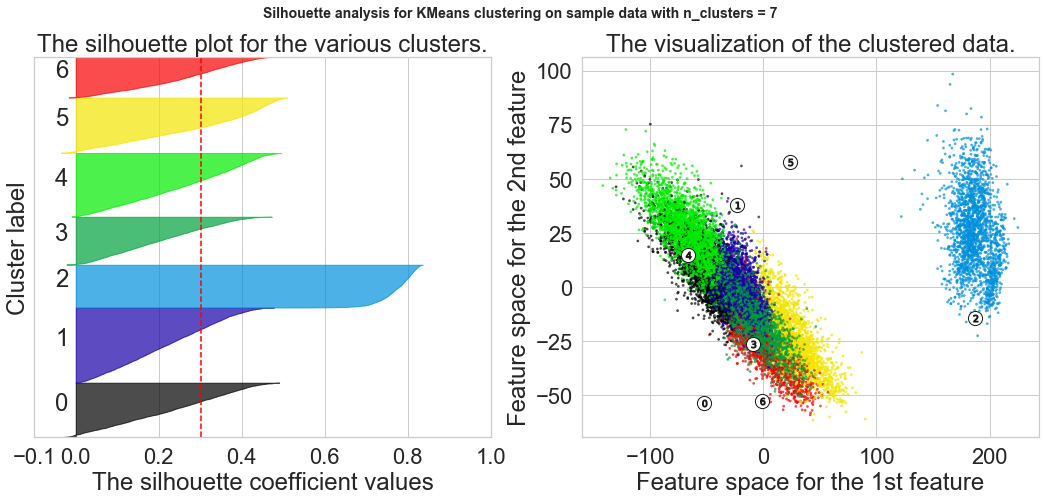

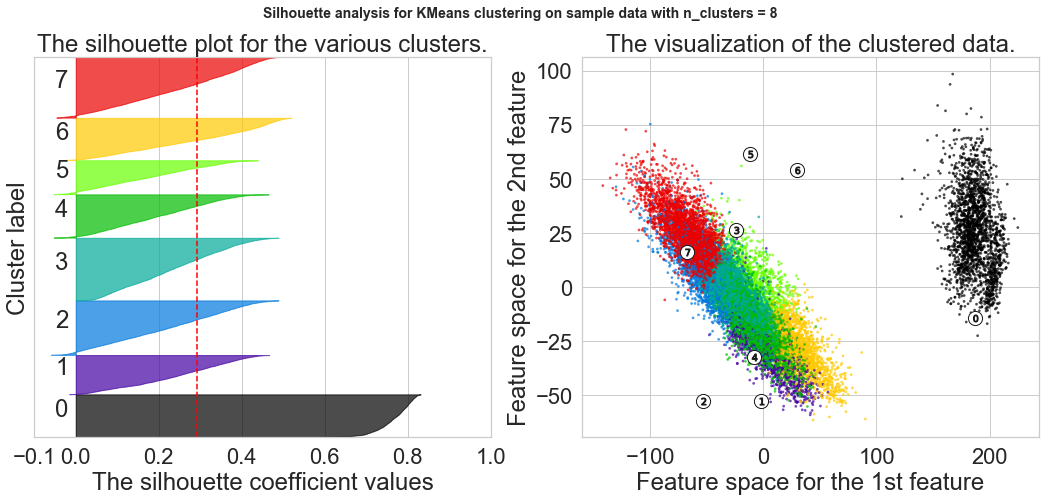

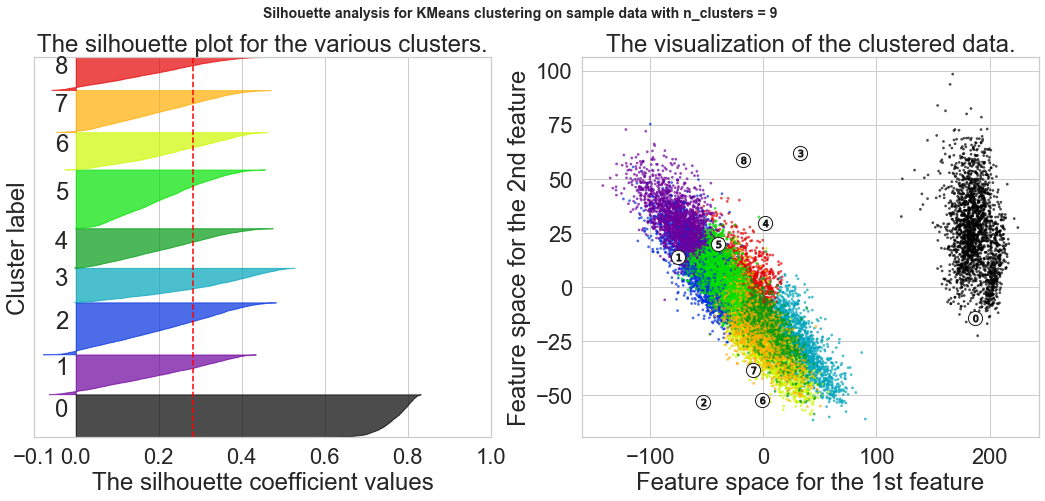

In [51]:
# snippet from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
K_clusters = range(2,10)
# Have to use np methods in the code below,thus the following: 
X = pc 

for n_clusters in K_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

ANSWER: Compared to yesterday the clusters seem to be slightly more concentrated. 
The elbow curve looks about the same.

### Compare PCA and t-sne for visualizing high dimensional data. This article on Visualising high-dimensional datasets using PCA and t-SNE in Python is a good starting point. Carefully read the article on How to Use t-SNE Effectively, so that you don’t get tricked by your plots!

In [93]:
kmeans = KMeans(n_clusters=3)
d = pd.DataFrame()
d['cluster_label'] = kmeans.fit_predict(data[data.columns[1:len(data.columns)-1]])

In [101]:
tsne = TSNE(n_components=3, verbose=1, perplexity=400, n_iter=1000)
tsne_results = tsne.fit_transform(data)

[t-SNE] Computing 1201 nearest neighbors...
[t-SNE] Indexed 17929 samples in 0.052s...
[t-SNE] Computed neighbors for 17929 samples in 25.782s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17929
[t-SNE] Computed conditional probabilities for sample 2000 / 17929
[t-SNE] Computed conditional probabilities for sample 3000 / 17929
[t-SNE] Computed conditional probabilities for sample 4000 / 17929
[t-SNE] Computed conditional probabilities for sample 5000 / 17929
[t-SNE] Computed conditional probabilities for sample 6000 / 17929
[t-SNE] Computed conditional probabilities for sample 7000 / 17929
[t-SNE] Computed conditional probabilities for sample 8000 / 17929
[t-SNE] Computed conditional probabilities for sample 9000 / 17929
[t-SNE] Computed conditional probabilities for sample 10000 / 17929
[t-SNE] Computed conditional probabilities for sample 11000 / 17929
[t-SNE] Computed conditional probabilities for sample 12000 / 17929
[t-SNE] Computed conditional probabilities for 

In [155]:
tsne1 = tsne_results[:,0]
tsne2 = tsne_results[:,1]
tsne3 = tsne_results[:,2]

In [173]:
pos["Preferred Positions"] = pd.Categorical(pos["Preferred Positions"])

In [177]:
pos['code'] = pd.factorize(pos['Preferred Positions'])[0]

In [178]:
pos

,Preferred Positions,code
ID,,
20801,ST,0
158023,RW,1
190871,LW,2
176580,ST,0
167495,GK,3
...,...,...
237463,GK,3
11728,GK,3
231381,ST,0


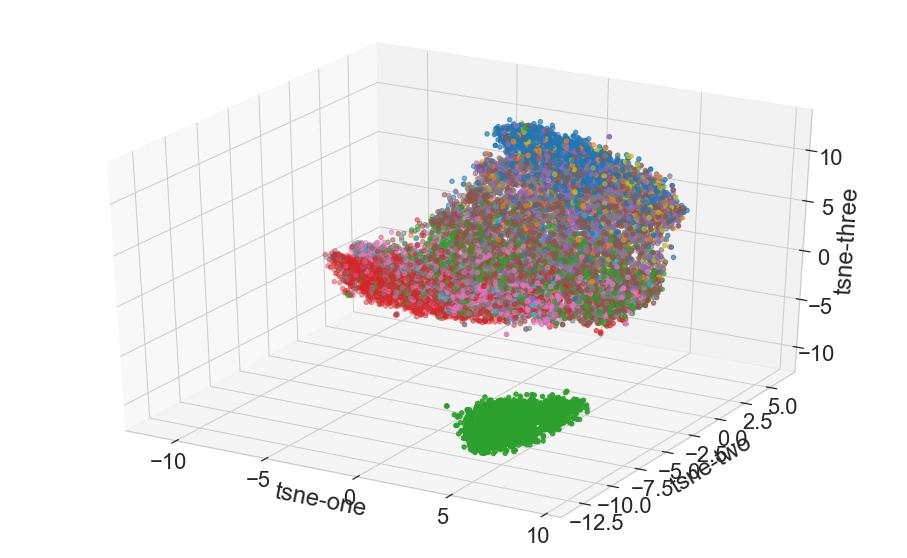

In [179]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=tsne1, 
    ys=tsne2, 
    zs=tsne3,
    c = pos['code'],
    cmap='tab10'
)
ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_zlabel('tsne-three')
plt.show()

In [113]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=tsne1, 
    ys=tsne2, 
    zs=tsne3,
    c = d["cluster_label"],
    cmap='tab10'
)
ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_zlabel('tsne-three')
plt.show()

,0,1,2,3,4,5
0,-123.698131,-90.090153,40.642110,29.960399,-44.287300,3.789566
1,-118.281036,-108.197023,39.831112,-3.326149,-9.031107,0.745076
2,-107.763792,-92.829316,32.030665,-9.492100,-12.031302,6.020696
3,-99.899507,-71.752526,75.210760,23.230199,-33.777735,8.413615
4,167.479055,-28.308983,98.391364,-6.787387,-55.050925,26.500706
...,...,...,...,...,...,...
17924,197.979135,-11.734229,-17.055021,2.833634,37.914363,10.809581
17925,179.431955,-3.430048,-16.295358,10.513496,18.439350,-12.312289
17926,57.195237,-47.278755,-48.725884,0.104767,12.037850,-30.554069
17927,37.237007,15.808193,-33.026629,-15.327020,23.468975,-10.496381


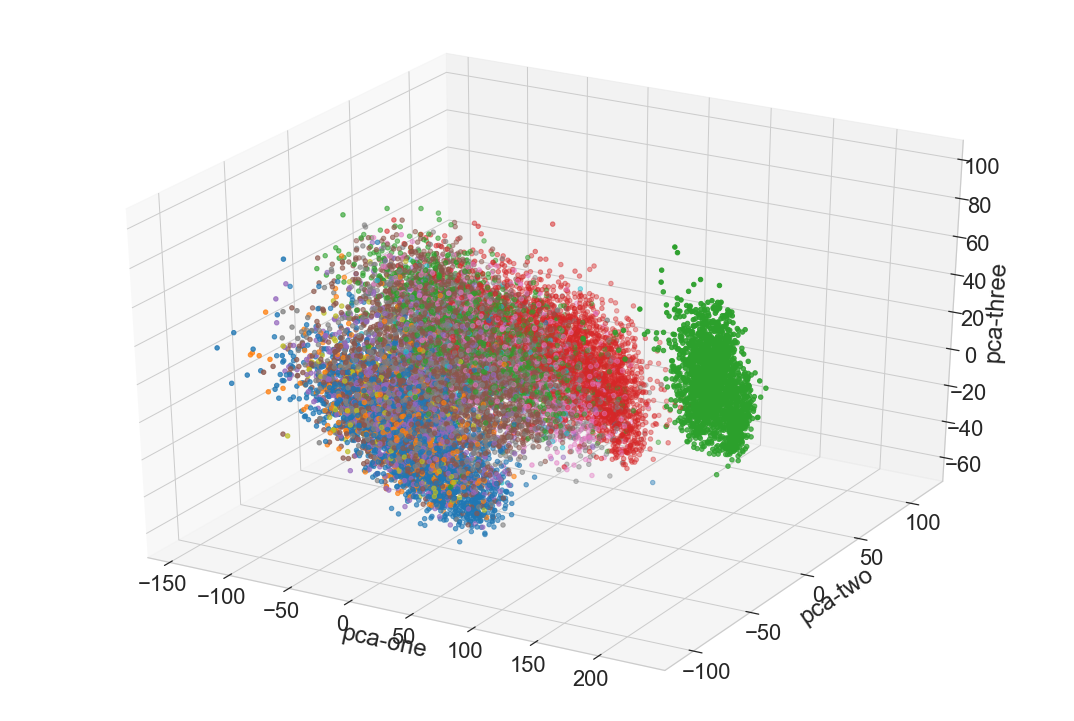

In [180]:
ax = plt.figure(figsize=(19,13)).gca(projection='3d')
ax.scatter(
    xs=pd.DataFrame(pc)[0], 
    ys=pd.DataFrame(pc)[1], 
    zs=pd.DataFrame(pc)[2], 
    c = pos['code'],
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

ANSWER: PCA has the advantage of not depending on hyperparameters, while TSNE can change dramatically depending on the perplexity and number of interations. TSNE can also reduce dimensions to a maximum of 3. 
Both seem to be equally good at representing the K-mean clusters in 3 dimensions. I suppose that PCA would be my first option and if it doesn't work I would try TSNE with different parameters until I could get a reasonable representation. 

In [125]:
reducer = umap.UMAP(n_components = 3,
                    n_neighbors = 15)

In [126]:
embedding = reducer.fit_transform(data)
embedding.shape

/opt/anaconda3/envs/propulsion/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../opt/anaconda3/envs/propulsion/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/opt/anaconda3/envs/propulsion/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


(17929, 3)

In [120]:
embedding

array([[ 9.621645 ,  6.5021615,  2.9645603],
       [ 9.423584 ,  6.4425883,  3.181122 ],
       [ 9.417648 ,  6.4169   ,  3.168384 ],
       ...,
       [10.836342 , 11.285668 ,  3.3839   ],
       [ 5.3295712, 10.625198 ,  4.397129 ],
       [ 1.0568157, 11.091956 ,  4.9540176]], dtype=float32)

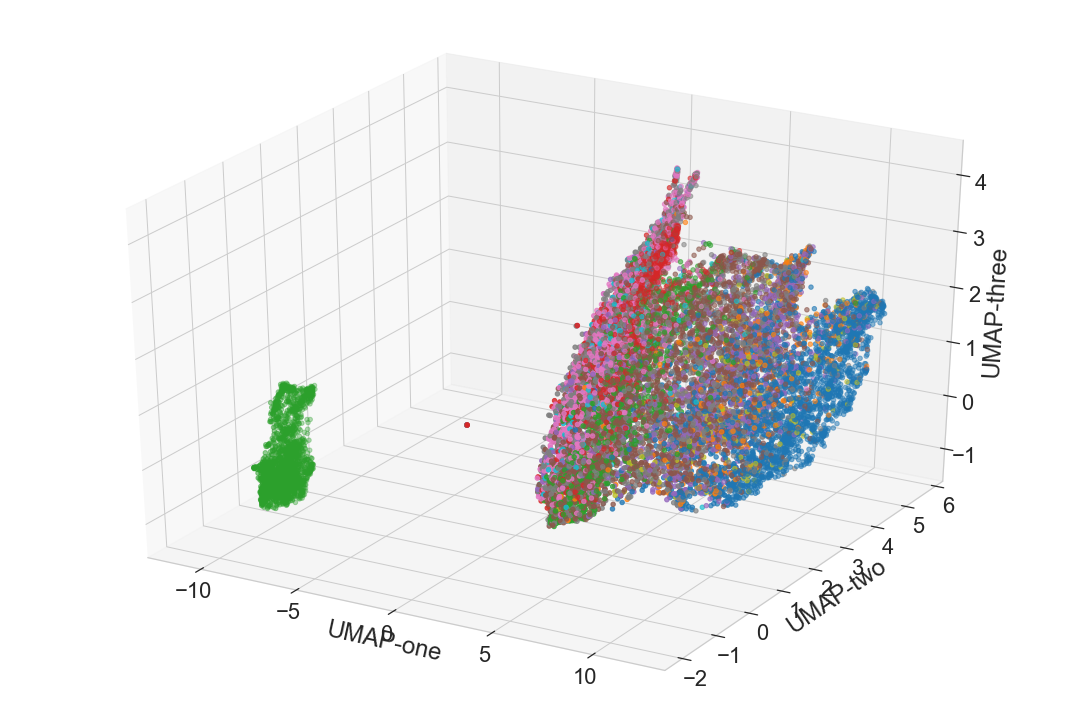

In [181]:
ax = plt.figure(figsize=(19,13)).gca(projection='3d')
ax.scatter(
    xs=pd.DataFrame(embedding)[0], 
    ys=pd.DataFrame(embedding)[1], 
    zs=pd.DataFrame(embedding)[2], 
    c = pos['code'],
    cmap='tab10'
)
ax.set_xlabel('UMAP-one')
ax.set_ylabel('UMAP-two')
ax.set_zlabel('UMAP-three')
plt.show()

### BONUS: LOF and Isolation Forest
- Apply LOF and Isolation Forest to the Arrhythmia dataset.
- Use visualizations to show the detected outliers.
- Compare the results from LOF and Isolation Forest.

In [2]:
d2 = pd.read_csv("/Users/patrickrs/Documents/GitLab/patrick-steiner/Exercises/data/arrhythmia.csv",
                  delimiter = ",",
                  #dtype = "float64",
                  verbose = True
                  )

Tokenization took: 20.85 ms
Type conversion took: 19.37 ms
Parser memory cleanup took: 0.02 ms


In [3]:
d2

,sex,di_width_ragged_r_wave,di_width_diphasic_derivation_of_r_wave,di_width_ragged_p_wave,di_width_diphasic_derivation_of_p_wave,di_width_ragged_t_wave,di_width_diphasic_derivation_of_t_wave,dii_width_ragged_r_wave,dii_width_diphasic_derivation_of_r_wave,dii_width_ragged_p_wave,...,v5_amp_qrsta,v6_amp_jj_wave,v6_amp_q_wave,v6_amp_r_wave,v6_amp_s_wave,v6_amp_rp_wave,v6_amp_p_wave,v6_amp_t_wave,v6_amp_qrsa,v6_amp_qrsta
0,1,0,0,0,0,0,0,0,0,0,...,0.562792,-0.674491,0.000000,-0.087679,0.674491,0.0,-1.011736,0.674491,0.209639,0.633789
1,0,0,0,0,0,0,0,0,0,0,...,0.769005,2.473133,0.000000,0.200103,-0.797125,0.0,-0.674491,1.770538,-0.528655,1.226875
2,0,0,0,0,0,0,0,0,0,0,...,1.619637,0.674491,0.000000,0.922430,-0.674491,0.0,-0.337245,1.096047,1.503932,1.959512
3,0,0,0,0,0,0,0,0,0,0,...,0.799078,-0.449661,0.000000,1.148664,-1.532934,0.0,-2.023472,2.192095,0.665376,2.029287
4,0,0,0,0,0,0,0,0,0,0,...,0.807670,0.449661,-1.092245,0.922430,-1.042395,0.0,1.348982,0.758802,-0.419278,0.186066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,1,0,0,0,0,0,0,0,0,0,...,-1.327501,0.449661,0.000000,-1.484238,-2.391376,0.0,0.674491,-0.590179,-2.050816,-1.651339
447,0,0,0,0,0,0,0,0,0,0,...,2.242574,-0.674491,0.000000,1.746696,-0.306587,0.0,-0.337245,0.927425,1.813833,2.006029
448,0,0,0,0,0,0,0,0,0,0,...,-4.034056,3.147624,0.000000,1.907136,-16.862269,0.0,3.372454,-0.252934,-5.678483,-3.552706
449,1,0,0,0,0,0,0,0,0,0,...,1.318909,0.899321,-0.728163,0.871265,0.245269,0.0,0.000000,0.927425,0.628917,1.087326


In [6]:
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors = 5, 
                         contamination = "auto")
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
clf.fit_predict(d2)
X_scores = clf.negative_outlier_factor_
len(X_scores)

451

In [203]:
np.sum((X_scores<-2)) # sum of True values

1

In [205]:
np.sum((X_scores<-1.5))

106

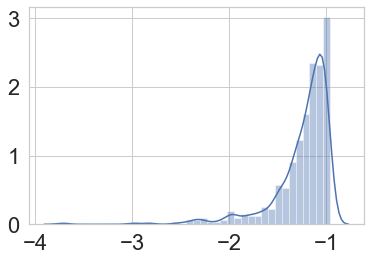

In [7]:
sns.distplot(X_scores)

In [8]:
clf = IsolationForest(random_state = 42).fit(d2)

In [9]:
outliers = clf.score_samples(d2)

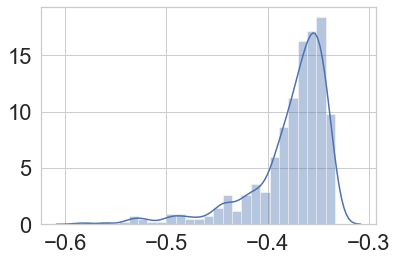

In [10]:
sns.distplot(outliers)
# The anomaly score of the input samples. 
# The lower, the more abnormal.

Int64Index([ 20801, 158023, 190871, 176580, 167495, 188545, 193080, 183277,
            182521, 167664,
            ...
            240325, 238306, 240403, 240404, 235352, 237463,  11728, 231381,
            238813, 238308],
           dtype='int64', name='ID', length=17929)